In [ ]:
pip install pandas seaborn matplotlib streamlit plotly numpy scipy plotnine

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from plotnine import ggplot, aes, geom_line, geom_smooth, facet_wrap, theme_minimal, labs, theme, element_text


Head of the data for usa:
      country  age  gender  year  population
30497     usa   99       2  2096      234218
30498     usa   99       2  2097      238246
30499     usa   99       2  2098      244246
30500     usa   99       2  2099      252778
30501     usa   99       2  2100      260993

Head of the data for ukr:
      country  age  gender  year  population
30497     ukr   99       2  2096       28318
30498     ukr   99       2  2097       27854
30499     ukr   99       2  2098       27451
30500     ukr   99       2  2099       27139
30501     ukr   99       2  2100       26890

Head of the data for aus:
      country  age  gender  year  population
30497     aus   99       2  2096       31512
30498     aus   99       2  2097       31545
30499     aus   99       2  2098       31862
30500     aus   99       2  2099       32377
30501     aus   99       2  2100       32700

Head of the data for bel:
      country  age  gender  year  population
30497     bel   99       2  2096     

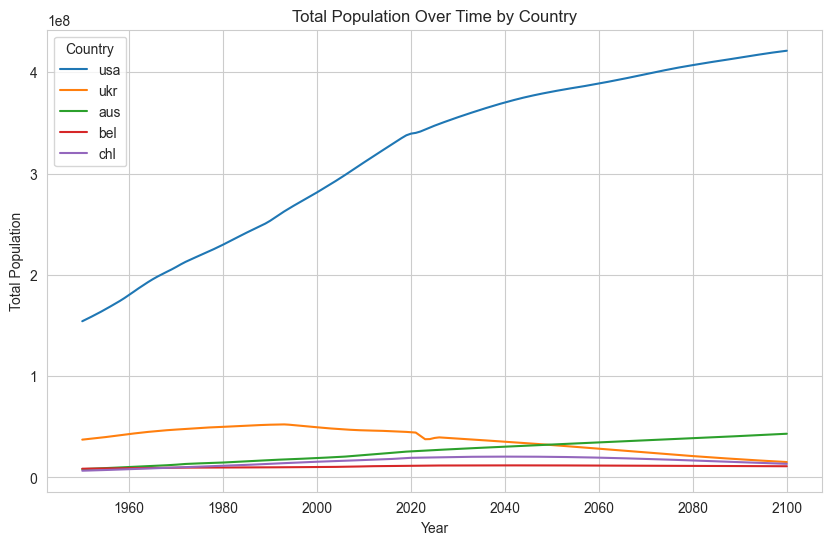

In [39]:
## Part 1: Matplotlib

#1. Create a line plot comparing total population over time:
#   - Choose 5 countries
#   - Calculate the total population by country for each year
#   - Create a line plot showing population trends
#   - Include a legend identifying each country
#   - Add appropriate axis labels and title
#   - Use different line styles or colors to distinguish the countries

#Define countries of interest
countries = ['usa', 'ukr', 'aus', 'bel', 'chl']  
data = {}

# use a loop to load the CSV file for the country selected
for country in countries:
  
    filename = f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    
    if os.path.exists(filename):  # Check if the file exists before reading
        data[country] = pd.read_csv(filename)
    else:
        print(f"File not found: {filename}")

# Review the data from each country
for country, df in data.items():
    print(f"\nHead of the data for {country.lower()}:")
    print(df.tail())

# Select 5 countries for comparison
countries = ['usa', 'ukr', 'aus', 'bel', 'chl']  

# Prepare a dictionary to store total population by country and year
country_population_by_year = {}

# Loop through the selected countries
for country in countries:
    df = data[country]
    
    # Assuming 'year' and 'population' columns exist in the dataframe
    # Group by year and sum the population
    population_by_year = df.groupby('year')['population'].sum()
    
    # Store the result in the dictionary
    country_population_by_year[country] = population_by_year

# Plot the population trends
plt.figure(figsize=(10, 6))

# Loop through each country to plot its data
for country, population in country_population_by_year.items():
    plt.plot(population.index, population.values, label=country)

# Add title and axis labels
plt.title('Total Population Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Total Population')

# Add a legend to identify each country
plt.legend(title='Country')

# Display the plot
plt.grid(True)
plt.show()    

No data for usa in 1950
No data for usa in 1985
No data for usa in 2020
No data for ukr in 1950
No data for ukr in 1985
No data for ukr in 2020
No data for aus in 1950
No data for aus in 1985
No data for aus in 2020
No data for bel in 1950
No data for bel in 1985
No data for bel in 2020


/var/folders/sm/pbmq3hsd2_sc3bbtxql41d380000gn/T/ipykernel_60650/2724408332.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


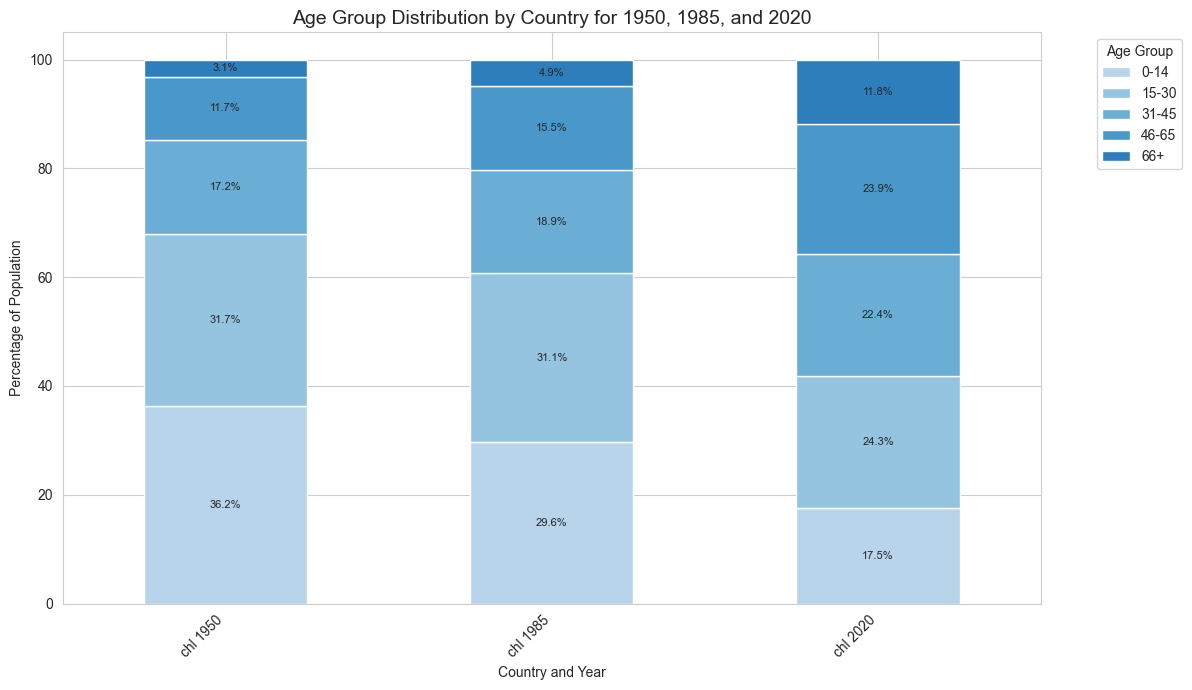

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the years and age groups
years = [1950, 1985, 2020]
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']

# Define age bins for pd.cut()
bins = [0, 14, 30, 45, 65, 100]
labels = age_groups

# Assume df contains the population data
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Ensure 'age' is numeric
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)  # Bin ages into groups

# Filter for the relevant countries and years
countries = ['usa', 'ukr', 'aus', 'bel', 'chl']

# Create a dictionary to store the population percentages for each country and year
percentage_data = []

# Loop over each country and year, and calculate the percentage for each age group
for country in countries:
    for year in years:
        # Filter data for the current country and year
        filtered_df = df[(df['country'] == country) & (df['year'] == year)]
        
        if filtered_df.empty:
            print(f"No data for {country} in {year}")
            continue
        
        # Group by age group and calculate the total population for each group
        age_group_totals = filtered_df.groupby('age_group')['population'].sum()
        
        # Calculate the total population for the country and year
        total_population = age_group_totals.sum()

        # Calculate the percentage of each age group
        percentages = (age_group_totals / total_population) * 100
        
        # Store the data for plotting
        percentage_data.append({
            'Country': country,
            'Year': year,
            **percentages.to_dict()  # Add the percentages as columns for each age group
        })

# Convert the percentage data into a DataFrame
plot_df = pd.DataFrame(percentage_data)

# Set 'Country_Year' for x-axis labels
plot_df['Country_Year'] = plot_df['Country'] + ' ' + plot_df['Year'].astype(str)

# Ensure the correct order for 'Country_Year'
plot_df['Country_Year'] = pd.Categorical(plot_df['Country_Year'], categories=plot_df['Country_Year'], ordered=True)

# Plot the stacked bar chart
colors = plt.cm.Blues(np.linspace(0.3, 0.7, len(age_groups)))  # Color scheme for age groups
plot_df.set_index('Country_Year')[age_groups].plot(kind='bar', stacked=True, color=colors, figsize=(12, 7))

# Add title and labels
plt.title('Age Group Distribution by Country for 1950, 1985, and 2020', fontsize=14)
plt.xlabel('Country and Year')
plt.ylabel('Percentage of Population')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with the percentage values
for i, row in plot_df.iterrows():
    cumulative = 0  # To track cumulative height for stacked annotation
    for age_group in age_groups:
        value = row[age_group]
        if value > 0:
            cumulative += value
            plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=8)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


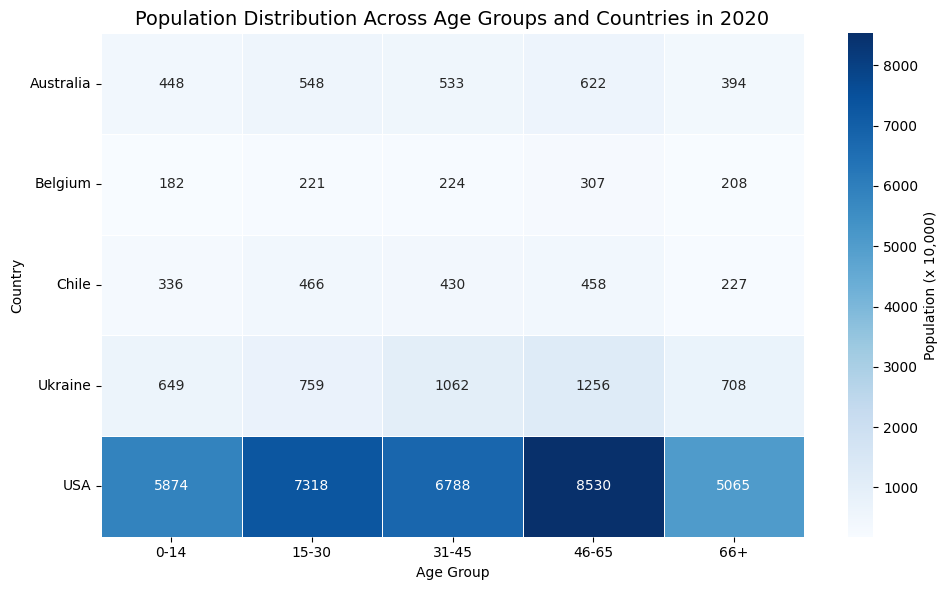

In [34]:
## Part 2: Seaborn
#1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and 
# country for 5 countries of your choice in a specific year.

# Define the specific year for which you want to visualize the data
year = 2020

# Create an empty DataFrame to store the population data for all countries
combined_data = pd.DataFrame()

# Loop through the countries and filter the data for the specific year
for country, df in data.items():
    # Filter the data for the selected year
    df_year = df[df['year'] == year].copy()  # .copy() ensures we are working on a copy
    
    # Create a new 'age_group' column by binning the ages using .loc[]
    df_year.loc[:, 'age_group'] = pd.cut(df_year['age'], bins=bins, labels=age_groups, right=True)
    
    # Add the country column to the DataFrame using .loc[]
    df_year.loc[:, 'country'] = country
    
    # Append the data to the combined_data DataFrame
    combined_data = pd.concat([combined_data, df_year])

# Group by country and age_group, summing the population for each group, with observed=False to suppress the warning
grouped_data = combined_data.groupby(['country', 'age_group'], observed=False)['population'].sum().unstack()

# Ensure all age groups are present in the data (fill missing values with 0)
grouped_data = grouped_data.reindex(columns=age_groups, fill_value=0)

# Scale down the population numbers by dividing by 10,000 (e.g., to represent 'per 10,000')
grouped_data_scaled = grouped_data / 10000

# Create a mapping of country codes to full names
country_labels = {
    'usa': 'USA',
    'ukr': 'Ukraine',
    'aus': 'Australia',
    'bel': 'Belgium',
    'chl': 'Chile'
}

# Get the current y-tick labels (country codes) and map them to full names
y_tick_labels = [country_labels.get(label, label) for label in grouped_data.index]



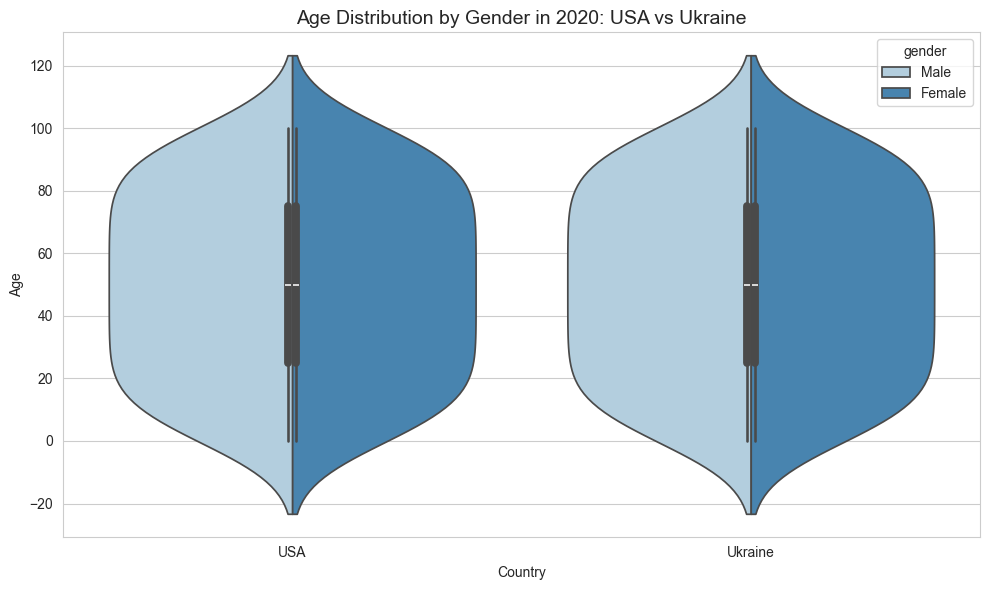

In [37]:
#2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.

# Set the Seaborn style before plotting
sns.set_style("whitegrid")

# define the HUSL color palette, stuck with blue theme 
palette = sns.color_palette("Blues", 2)  

# filter dataset to year 2020
year = 2020

# specify the two countries for comparison
countries_to_compare = ['usa', 'ukr']

# combine data for selected countries in the selected year
df_comparison = pd.DataFrame()

# Loop through the countries and filter the data for 2020
for country, df in data.items():
    if country in countries_to_compare:
        # Filter for the selected year and append to the comparison DataFrame
        df_year = df[df['year'] == year].copy()
        df_year['country'] = country  # Add country label to the data
        df_comparison = pd.concat([df_comparison, df_year])

# Map gender 1 to 'Male' and gender 2 to 'Female'
gender_labels = {1: 'Male', 2: 'Female'}
df_comparison['gender'] = df_comparison['gender'].map(gender_labels)

# create a mapping for full country names to improve visualization
country_labels = {
    'usa': 'USA',
    'ukr': 'Ukraine'
}

# Map the full country names to the 'country' column
df_comparison['country'] = df_comparison['country'].map(country_labels)

# create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='country', y='age', hue='gender', data=df_comparison, split=True, palette=palette)

# specify labels and title
plt.title(f'Age Distribution by Gender in 2020: {country_labels["usa"]} vs {country_labels["ukr"]}', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()


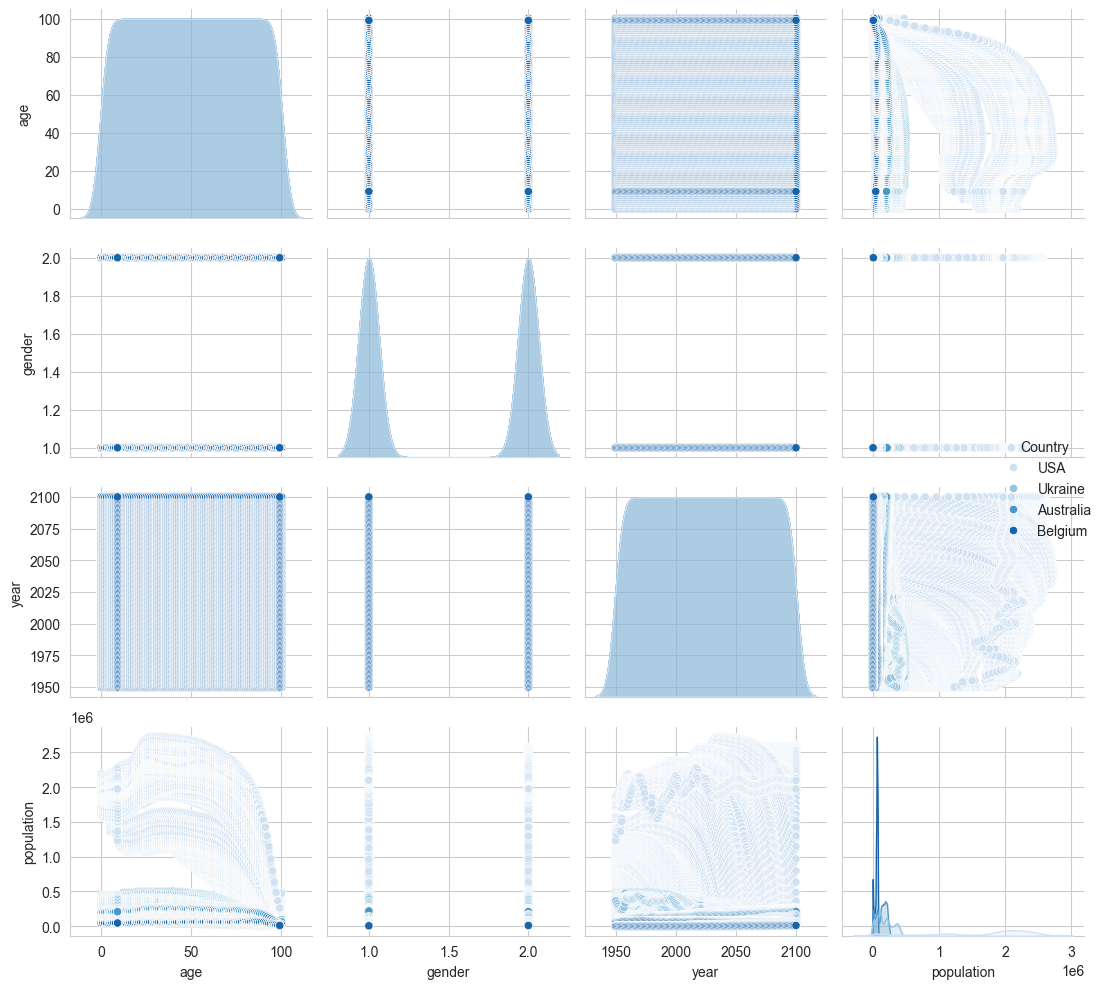

In [5]:
##3. Create a pairplot comparing population metrics across four countries:

# Define the countries you want to compare
countries = ['usa', 'ukr', 'aus', 'bel']  
data = {}

# Load data for each country from the CSV files
for country in countries:
    filename = f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    
    # Check if the file exists before reading
    if os.path.exists(filename):  
        data[country] = pd.read_csv(filename)
    else:
        print(f"File not found: {filename}")

# set the Seaborn style before plotting
sns.set_style("whitegrid")

# combine data for the selected countries
df_comparison = pd.concat([df.assign(country=country) for country, df in data.items() if country in countries])

# mapping dictionary for full country names
country_labels = {
    'usa': 'USA',
    'ukr': 'Ukraine',
    'aus': 'Australia',
    'bel': 'Belgium'
}

# map the full country names to the 'country' column
df_comparison['country'] = df_comparison['country'].map(country_labels)

# create the pairplot using Seaborn, stuck with similar color palette
palette = sns.color_palette("Blues", len(countries))
pairplot = sns.pairplot(df_comparison, hue='country', diag_kind='kde', palette=palette)

# specify legend 
pairplot._legend.set_bbox_to_anchor((1, 0.5))  
pairplot._legend.set_title("Country")

# show the plot
plt.tight_layout()
plt.show()


/var/folders/sm/pbmq3hsd2_sc3bbtxql41d380000gn/T/ipykernel_60650/2641825637.py:68: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


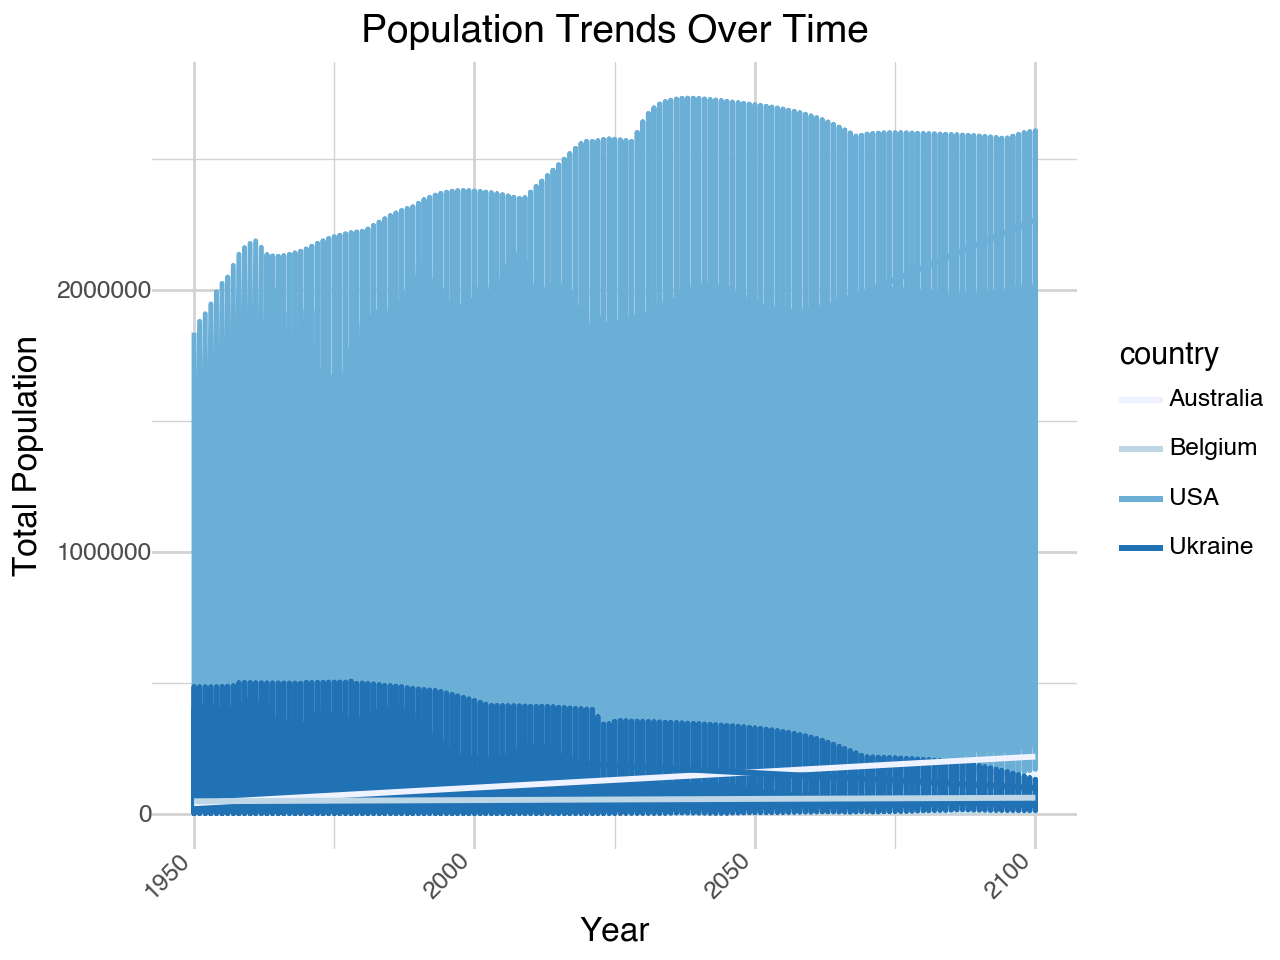

/var/folders/sm/pbmq3hsd2_sc3bbtxql41d380000gn/T/ipykernel_60650/2641825637.py:69: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


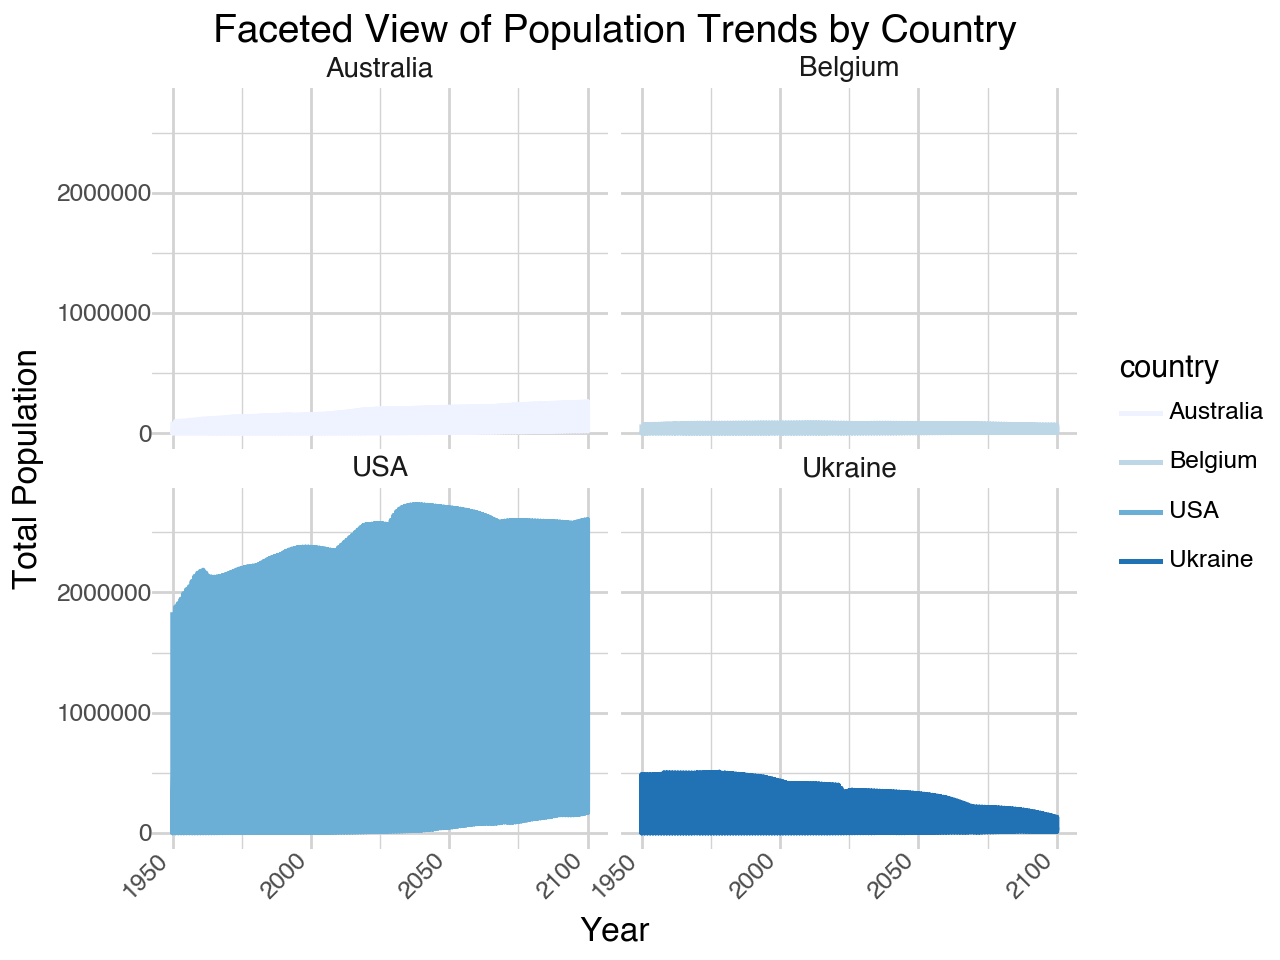

In [16]:
#### Using plotnine

# Define the countries you want to compare
countries = ['usa', 'ukr', 'aus', 'bel']  
data = {}

# Load data for each country from the CSV files
for country in countries:
    filename = f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    
    if os.path.exists(filename):  # Check if the file exists before reading
        data[country] = pd.read_csv(filename)
    else:
        print(f"File not found: {filename}")

# Combine data for the selected countries into a single DataFrame
df_combined = pd.concat([df.assign(country=country) for country, df in data.items() if country in countries])

# Ensure the year column is treated as numeric
df_combined['year'] = pd.to_numeric(df_combined['year'])

# Map country codes to full names
country_labels = {
    'usa': 'USA',
    'ukr': 'Ukraine',
    'aus': 'Australia',
    'bel': 'Belgium'
}
df_combined['country'] = df_combined['country'].map(country_labels)

# 1. Smooth Trend Lines: Population trends over time with linear smoothing
plot_population_trend = (
    ggplot(df_combined, aes(x='year', y='population', color='country')) +
    geom_line(size=1) +  # Thicker lines for better visibility
    geom_smooth(method='lm', se=False, size=1.2) +  # Thicker trend lines
    scale_color_brewer(type='seq', palette='Blues') +  # Use sequential blues
    labs(title="Population Trends Over Time", x="Year", y="Total Population") +
    theme_minimal() +  # Minimal theme for clean look
    theme(
        legend_position='right',
        axis_text_x=element_text(rotation=45, hjust=1),
        plot_title=element_text(size=14, face="bold"),
        axis_title=element_text(size=12),
        panel_grid_major=element_text(color="lightgray"),  # Lighter grid lines
        panel_background=element_text(fill="white"),  # White background
        panel_grid_minor=element_text(color="lightgray")
    )
)

# 2. Faceted Views: Compare countries using faceting
plot_faceted = (
    ggplot(df_combined, aes(x='year', y='population')) +
    geom_line(aes(color='country'), size=1) +  # Thicker lines for better visibility
    facet_wrap('~country', ncol=2) +
    scale_color_brewer(type='seq', palette='Blues') +  # Use sequential blues
    labs(title="Faceted View of Population Trends by Country", x="Year", y="Total Population") +
    theme_minimal() +  # Minimal theme for clean look
    theme(
        strip_text=element_text(size=10, face="bold"),
        axis_text_x=element_text(rotation=45, hjust=1),
        plot_title=element_text(size=14, face="bold"),
        axis_title=element_text(size=12),
        panel_grid_major=element_text(color="lightgray"),  # Lighter grid lines
        panel_background=element_text(fill="white"),  # White background
        panel_grid_minor=element_text(color="lightgray")
    )
)

# Display the plots
print(plot_population_trend)
print(plot_faceted)
